In [2]:
import pandas as pd
#constructor_results = pd.read_csv("constructor_results.csv")
#constructor_standings = pd.read_csv("constructor_standings.csv")
#constructors = pd.read_csv('constructors.csv')
#driver_standings = pd.read_csv("driver_standings.csv")
#pit_stops = pd.read_csv("pit_stops.csv")
#qualifying = pd.read_csv("qualifying.csv")
#results = pd.read_csv("results.csv")
#seasons = pd.read_csv("seasons.csv")
#status = pd.read_csv("status.csv")

drivers = pd.read_csv('driver.csv')
circuits = pd.read_csv("circuits.csv")
races = pd.read_csv("races.csv")
lap_times = pd.read_csv("lap_times.csv")

In [3]:
# drivers subset for join 
races_subset = races[["raceId", "circuitId","name", "date"]]

In [4]:
# drivers subset
drivers["fullname"] = drivers["forename"].map(str) + " " + drivers["surname"]
drivers_subset = drivers[["driverId", "fullname"]]

In [5]:
# rename some columns
circuits = circuits.rename(columns={'circuitID': 'circuitId', "name":"circuit_name"})

In [6]:
# subset to maintain intitial data
lap_times_subset = lap_times

# join driver to driver id
lap_times_subset = pd.merge(left = lap_times_subset, right = drivers_subset, on = "driverId")

# join raceId
lap_times_subset = pd.merge(left = lap_times_subset, right = races_subset, on = "raceId")

# join by circuit
lap_times_subset = pd.merge(left = circuits[["circuitId", "circuit_name"]], right = lap_times_subset, on = "circuitId")

In [7]:
# convert to datetime to make date manipulation easier - takes a while
lap_times_subset['date'] = pd.to_datetime(lap_times_subset['date'])

# make year column
lap_times_subset["year"] = lap_times_subset.date.dt.year

In [8]:
# make dataframe to be plotted
mean_laptimes_by_track = lap_times_subset[["year", "name", "circuit_name", "milliseconds"]]
# change milliseconds name to time

mean_laptimes_by_track = mean_laptimes_by_track.rename(columns = {"milliseconds":"time"})
mean_laptimes_by_track.to_csv('no_mean_lap_times.csv')

In [8]:
# group by circuit and year and find average time
mean_laptimes_by_track = mean_laptimes_by_track.groupby(["name","circuit_name", "year"]).mean()

# convert ms to time
#mean_laptimes_by_track.time = pd.to_timedelta(mean_laptimes_by_track.time, unit='ms')

In [9]:
races_2018 = ['Australian Grand Prix', 'Bahrain Grand Prix', 'Spanish Grand Prix','Monaco Grand Prix',
              'Canadian Grand Prix', 'French Grand Prix', 'British Grand Prix', 'German Grand Prix',
              'Hungarian Grand Prix','Belgian Grand Prix', 'Italian Grand Prix','Singapore Grand Prix',
              'Japanese Grand Prix','Chinese Grand Prix','Brazilian Grand Prix','United States Grand Prix',
              'Austrian Grand Prix','Abu Dhabi Grand Prix','Mexican Grand Prix', 'Russian Grand Prix', 'Azerbaijan Grand Prix']

In [10]:
# sace as csv because python is formatting it weird
mean_laptimes_by_track.to_csv('mean_lap_times.csv')

In [11]:
mean_laps = pd.read_csv("mean_lap_times.csv")
tracks_2018_mean_laps = mean_laps[mean_laps.name.isin(races_2018)]

In [12]:
# Convert to datetime, ignore warnings
tracks_2018_mean_laps.time = pd.to_timedelta(tracks_2018_mean_laps.time, unit='ms')
tracks_2018_mean_laps["time"] = pd.to_datetime(tracks_2018_mean_laps["time"])
tracks_2018_mean_laps["time"] = tracks_2018_mean_laps.time.dt.strftime("%M:%S.%f")

C:\Users\jackt\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\jackt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jackt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

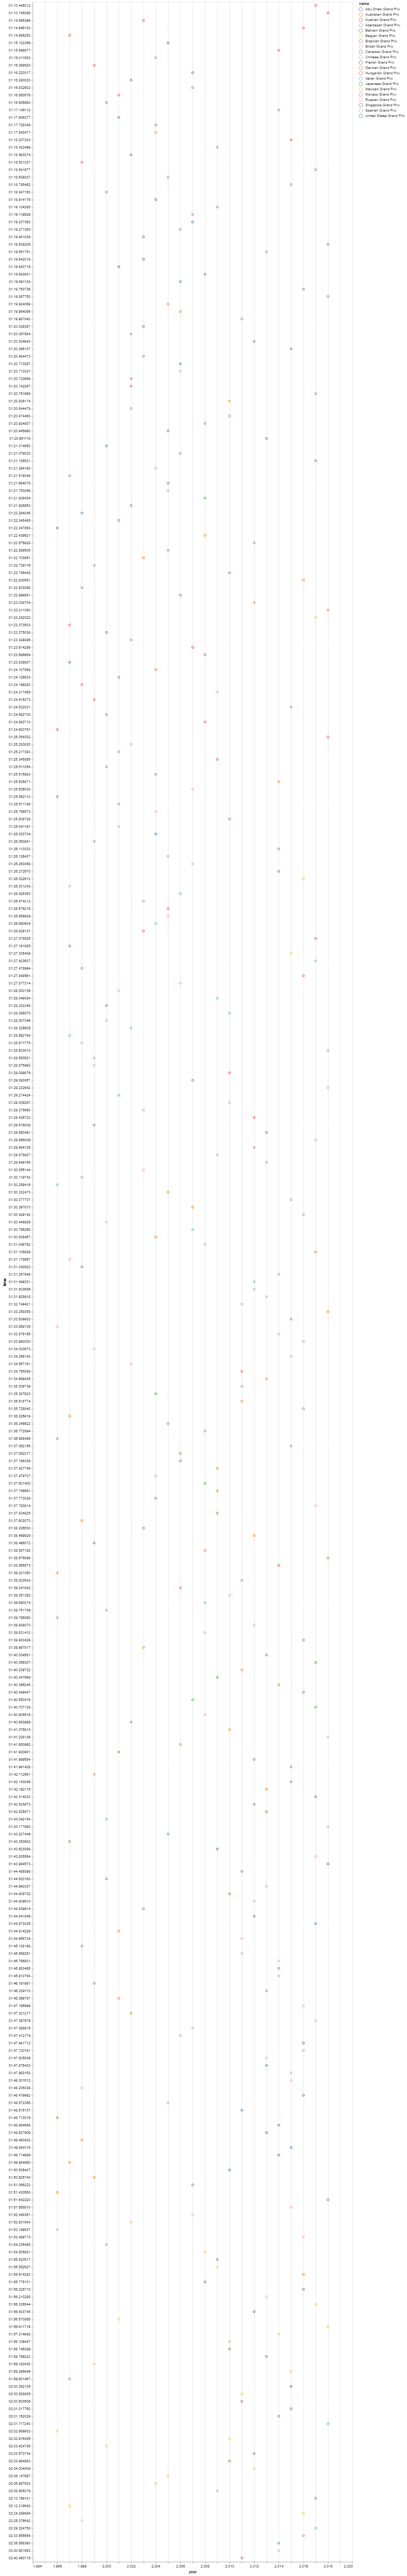

In [74]:
import altair as alt

alt.Chart(tracks_2018_mean_laps, width=900).mark_point().encode(
    x = alt.X("year", scale=alt.Scale(domain=(1995, 2019), clamp = True)),
    y= alt.Y('time'),
    color='name',
    tooltip='name'
).interactive().add_selection()

#, timeUnit = "year"